# Principal Component Analysis

In [5]:
import numpy as np
import scipy.linalg as la
from sklearn import datasets
import matplotlib.pyplot as plt

Let $\mathbf{x}_1,\dots,\mathbf{x}_n \in \mathbb{R}^p$ such that the average of the points is located at the origin

$$
\frac{1}{n} \sum_{k=1}^n \mathbf{x}_k = \mathbf{0}
$$

[Principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) seeks an orthonormal basis $\mathbf{w}_1 , \dots , \mathbf{w}_n$ such that $\mathbf{w}_1$ captures the most information (ie. the most variance of the data), and $\mathbf{w}_2$ captures the most information orthogonal to $\mathbf{w}_1$ and so on.

Let $X$ be the $n \times p$ data matrix with rows $\mathbf{x}_1,\dots,\mathbf{x}_n$. The weight vectors $\mathbf{w}_1 , \dots , \mathbf{w}_n$ are the (right) singular vectors of $X$. That is, the columns of the matrix $Q$ in the singular value decomposition $X = P \Sigma Q^T$.

## 2D Fake Data

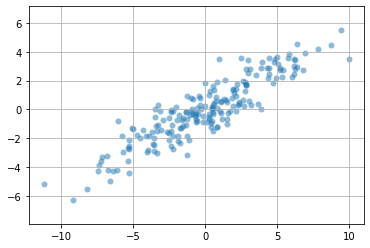

In [6]:
N = 200
x = 4*np.random.randn(N)
y = 0.75*np.random.randn(N)
X = np.column_stack((x,y))
X = X - X.mean(axis=0)
theta = np.pi/6
R = np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
X = X@R
plt.scatter(X[:,0],X[:,1],alpha=0.5,lw=0)
plt.grid(True); plt.axis('equal'); plt.show();

Compute the SVD of the data matrix:

In [7]:
P,S,QT = la.svd(X)

The weight vectors are the rows of $Q^T$:

In [8]:
QT

array([[ 0.8774251 ,  0.47971365],
       [-0.47971365,  0.8774251 ]])

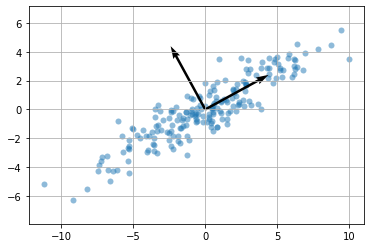

In [9]:
plt.scatter(X[:,0],X[:,1],alpha=0.5,lw=0)
plt.quiver(QT[0,0],QT[0,1],angles='xy',scale_units='xy',scale=0.2)
plt.quiver(QT[1,0],QT[1,1],angles='xy',scale_units='xy',scale=0.2)
plt.grid(True); plt.axis('equal'); plt.show();

## Digits dataset

[sklearn](https://scikit-learn.org/stable/) is the Python package for machine learning. There are efficient implementations of algorithms such as PCA included in sklearn however let us use the function `scipy.linalg.svd`.

The digits dataset includes 1797 images of handwritten digits. Let's import the data.

In [10]:
digits = datasets.load_digits()

In [11]:
D = digits['data']

In [12]:
D.shape

(1797, 64)

The matrix $D$ has 1797 rows and 64 columns. Each row is a 8 by 8 pixel image which has been flattened into a row vector of length 64. Select a row, reshape into an 8 by 8 matrix and plot the image.

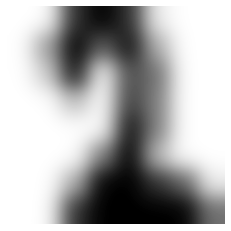

In [20]:
plt.imshow(D[1051,:].reshape(8,8),cmap='binary',interpolation='gaussian')
plt.axis(False); plt.show();

Normlize the matrix by computing the mean of each column and subtracting the result from every row.

In [21]:
X = D - D.mean(axis=0)

Compute the SVD and plot the first weight vector.

In [22]:
P,S,QT = la.svd(X)

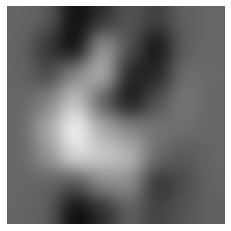

In [23]:
plt.imshow(QT[0,:].reshape(8,8),cmap='binary',interpolation='gaussian')
plt.axis(False); plt.show()

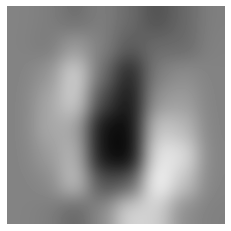

In [24]:
plt.imshow(QT[1,:].reshape(8,8),cmap='binary',interpolation='gaussian')
plt.axis(False); plt.show()

Project the normalized data matrix onto the first two weight vectors.

In [25]:
X2d = X @ QT[0:2,:].T

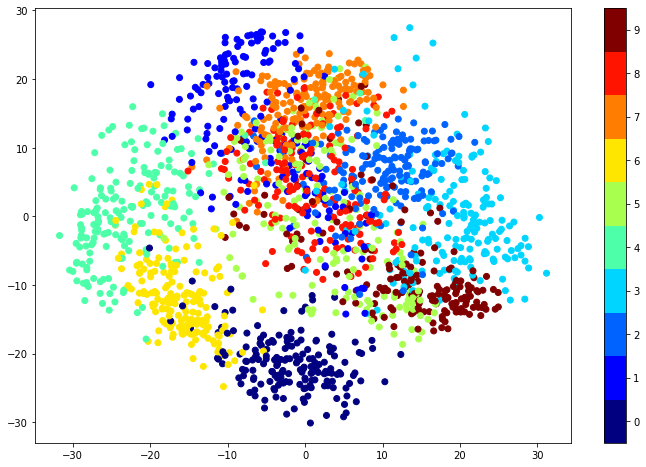

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(X2d[:,0],X2d[:,1],c=digits['target'],cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(0,10)); plt.clim([-0.5,9.5]);
plt.show()